# Traffic Sign Recognition

## Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

The goals / steps of this project are the following:

+ Load the data set (see below for links to the project data set)
+ Explore, summarize and visualize the data set
+ Design, train and test a model architecture
+ Use the model to make predictions on new images
+ Analyze the softmax probabilities of the new images
+ Summarize the results with a written report

## Rubric Points
### Here I will consider the rubric points individually and describe how I addressed each point in my implementation.
You're reading it! and here is a link to my project code



---
## Step 0: Load The Data

In [60]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../../traffic-signs-data/train.p"
validation_file = "../../traffic-signs-data/valid.p"
testing_file = "../../traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### 1. Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas.

I used the pandas library to calculate summary statistics of the traffic signs data set:

+ The size of training set is 34799
+ The size of the validation set is 4410
+ The size of test set is 12630
+ The shape of a traffic sign image is (32,32)
+ The number of unique classes/labels in the data set is 43 

In [2]:
import numpy as np
import pandas as pd

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_validation.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1],X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### 2. Include an exploratory visualization of the dataset

Here is an exploratory visualization of the data set. The bar charts display the class distribution of training set, validation set and testing set, respectively. As displayed, the distributions look relative similar and very screwed. some classes have more examples than other classes.

In [3]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

#### Plot class distribution in the training, validation, and test sets

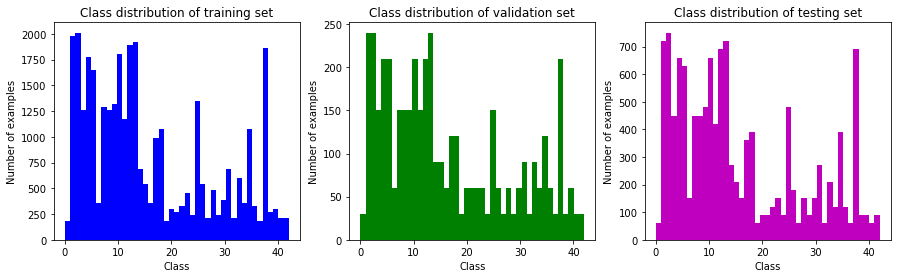

In [4]:
# Plot class distribution by class IDs
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
h_train = plt.hist(y_train, color='b', bins=n_classes)
plt.xlabel('Class'), plt.ylabel('Number of examples'), plt.title('Class distribution of training set')
plt.subplot(1,3,2)
h_validation = plt.hist(y_validation, color='g', bins=n_classes)
plt.xlabel('Class'), plt.ylabel('Number of examples'), plt.title('Class distribution of validation set')
plt.subplot(1,3,3)
h_test = plt.hist(y_test, color='m', bins=n_classes)
plt.xlabel('Class'), plt.ylabel('Number of examples'), plt.title('Class distribution of testing set')
plt.show()

Below are class distribution displayed by sign names

Index(['ClassId', 'SignName'], dtype='object')


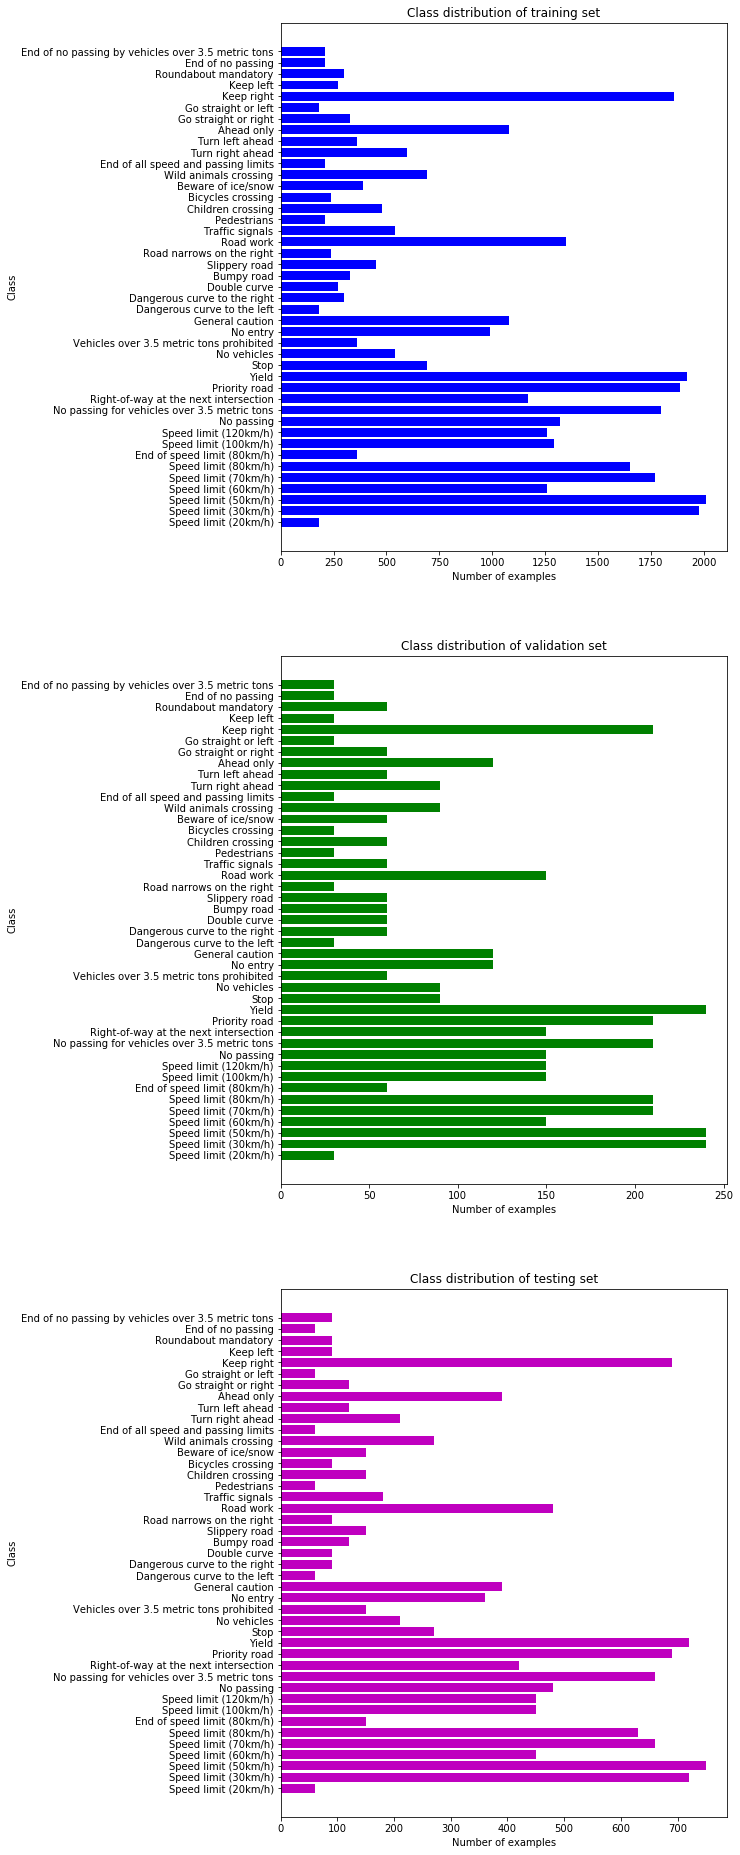

In [5]:
# Plot class distribution by sign names
signnames_file = "../../traffic-signs-data/signnames.csv"
signnames = pd.read_csv("signnames.csv")
print(signnames.columns)

# Display traffic sign names
plt.figure(figsize=(8,33))
plt.subplot(3,1,1)
plt.barh(signnames['ClassId'], h_train[0], color='b', tick_label=signnames['SignName'])
plt.ylabel('Class'), plt.xlabel('Number of examples'), plt.title('Class distribution of training set')
plt.subplot(3,1,2)
plt.barh(signnames['ClassId'], h_validation[0], color='g', tick_label=signnames['SignName'])
plt.ylabel('Class'), plt.xlabel('Number of examples'), plt.title('Class distribution of validation set')
plt.subplot(3,1,3)
plt.barh(signnames['ClassId'], h_test[0], color='m', tick_label=signnames['SignName'])
plt.ylabel('Class'), plt.xlabel('Number of examples'), plt.title('Class distribution of testing set')
plt.show()

**Comment:** The class distribution of the training, validation, and test sets look the same. The distributions are skewed. We can generate fake data for better training performance by using image augmentation techniques such as image translation, rotation, brightness, distortion, etc.

#### Plot traffic sign images

The original images come with different sizes. However, in the dataset provided, the images already resized to 32x32 RGB images. Below I will show a random image with its information. Then I will plot a group of different classes and a group of image of the same class for better understanding the image characteristics.

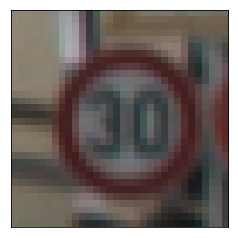

Original size: [38 38]
Class Id : 1
Sign name: Speed limit (30km/h)


In [6]:
# Plot a random resized image with its original size, class ID and sign name
sizes_train = train['sizes']
sizes_valid = valid['sizes']
sizes_test = test['sizes']
np.random.seed(0)
ind = np.random.randint(X_train.shape[0], size=1)[0]
plt.imshow(X_train[ind])
plt.xticks([]), plt.yticks([]), plt.show()
print("Original size: {}".format(sizes_train[ind]))
class_id = y_train[ind]
print("Class Id : {}".format(class_id))
print("Sign name: {}".format(signnames.SignName[class_id]))

In [7]:
# Plot multiple images with original size, class ID and sign name

def plot_images(X, y, cols=5, sign_name=None, orignal_size=None, cmap=None, func=None):
    """
    Show images and their information
    """
    num_images = len(X)
    rows = np.ceil(num_images/cols)
    plt.figure(figsize=(cols*3.5,rows*3))
    for i in range(X.shape[0]):
        image = X[i]
        plt.subplot(rows, cols, i+1)
        if func is not None:
            image = func(image)
        plt.imshow(image, cmap=cmap)
        plt.xticks([]), plt.yticks([])#, plt.show()   
        if sign_name is not None:
            class_id = y[i]
            plt.text(0, 0, '{}: {}'.format(class_id, sign_name.SignName[class_id]), color='black',backgroundcolor='orange', fontsize=8)        
        if orignal_size is not None:
            plt.text(0, image.shape[0], '{}'.format(orignal_size[i]), color='black',backgroundcolor='gray', fontsize=8)    
    plt.show()

def select_images(X, y, class_id=None, num_images=20):
    """
    Randomly select image's indices based on class_id
    """
    if class_id is not None:
        indices = np.where(y==class_id)[0]
    else:
        indices = np.where(y)[0]
    
    np.random.seed(0)
    ind = np.random.randint(np.size(indices), size=num_images)
    # print(indices[ind])
    print("Class: {}".format(np.unique(y[indices[ind]])))
    return indices[ind]    

Class: [ 1  2  4  7  8 10 12 16 17 18 23 35 38]


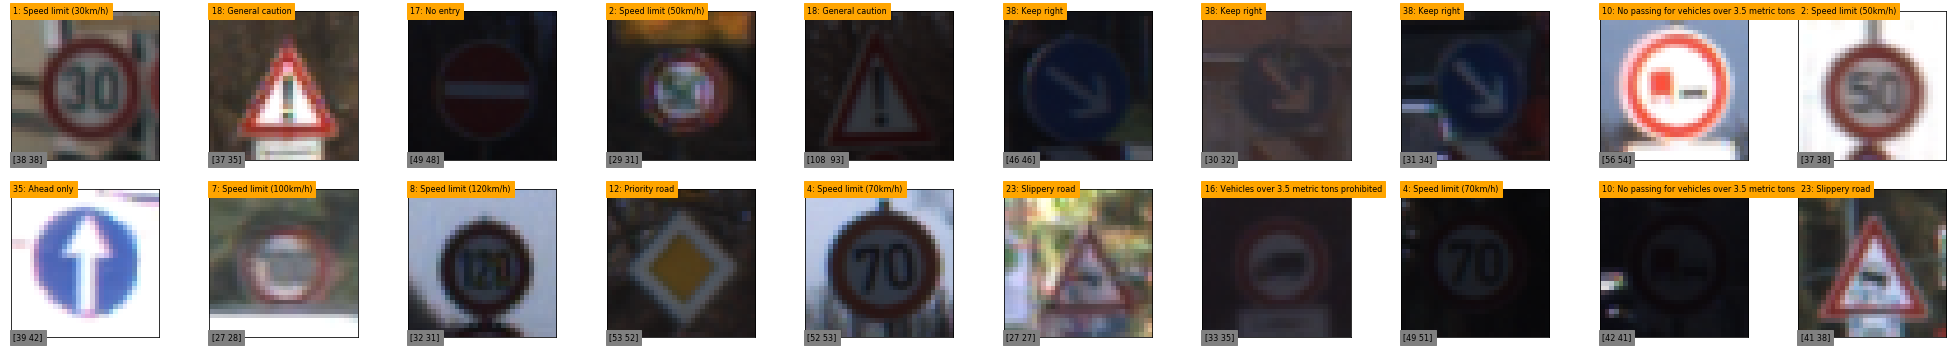

Class: [20]


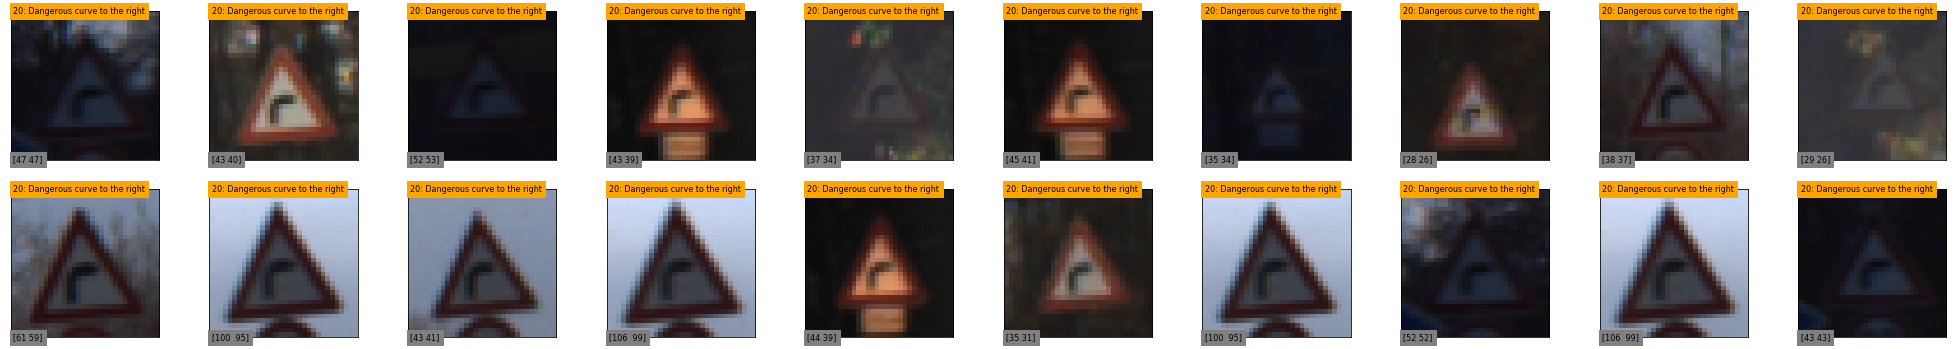

Class: [5]


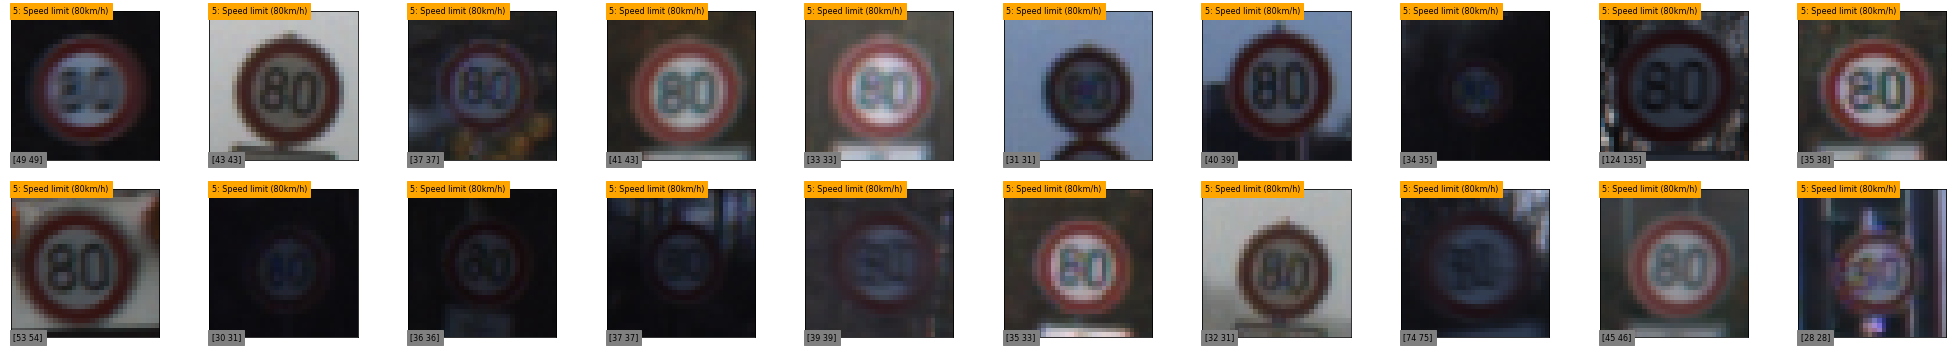

In [8]:
# Plot randomly 20 examples
indices = select_images(X_train, y_train, class_id=None, num_images=20)
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices])
# Randomly select image's indices based on class_id
indices = select_images(X_train, y_train, class_id=20, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices])
indices = select_images(X_train, y_train, class_id=5, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices])

**Comment:** we can draw some conclusions about the image characteristics:
+ Images have different original size, making the signs are different in size --> This problem is already processed by scaling images to 32x32 in the downloaded dataset.
+ The brightness/darkness of the images are randomly different --> This problem can be improved by normalizing the images
+ Signs may be not straight and centered but slightly translated and rotated.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).


There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.


### 1. Pre-process the Data Set (normalization, grayscale, etc.)

Some pre-processing techniques are considered, firstly, converting the images from RGB to grayscale due to its efficiency in processing since grayscale images only have 1 channel compared to 3 channels of RGB images. However, I finds that colors contain some information that raw grayscale values cannot capture. Traffic signs often have a distinct color scheme, and it might be indicative of the information it is trying to convey (that is, red for stop signs and forbidden actions, green for informational signs, etc). So we can use the RGB images as input for the next steps in the trade off of the performance and computational cost. Even more, the RGB might not be informative enough. For example, a stop sign in broad daylight might appear very bright and clear, but its colors might appear much less vibrant on a rainy or foggy day. A better choice might be the HSV color space, which rearranges RGB color values in a cylindrical coordinate space along the axes of hue, saturation, and value (or brightness). So I might convert the RGB image to HSV color space and compare the testing results.

Another pre-processing method is normalization due to the variation of image brightness. The idea is to enhance the local intensity contrast of images so that we do not focus on the overall brightness of an image. Some normalization methods are considered and tested to get the best normalization method for this dataset.



In [8]:
import math
import cv2

# Convert an image from rgb to grayscale
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
# Convert an image from rgb to hsv
def convert_hsv(img):
    """Convert image from rgb to hsv color space"""
    return cv2.cvtColor(x, cv2.COLOR_RGB2HSV)   
    
#Normalize the data for better brightness/darkness variation
#Implement Min-Max scaling for grayscale image data
def normalize(x, method=1):
    """
    For image data, (pixel - 128)/ 128 is a quick way to approximately normalize the data 
    and can be used in this project
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    if method == 1:
        x_scaled = (x - 128)/128
    if method == 2:
        x_scaled = (x - x.mean())/x.std()
    return x_scaled   

Here is the example of above traffic sign images after grayscaling.

Class: [ 1  2  4  7  8 10 12 16 17 18 23 35 38]


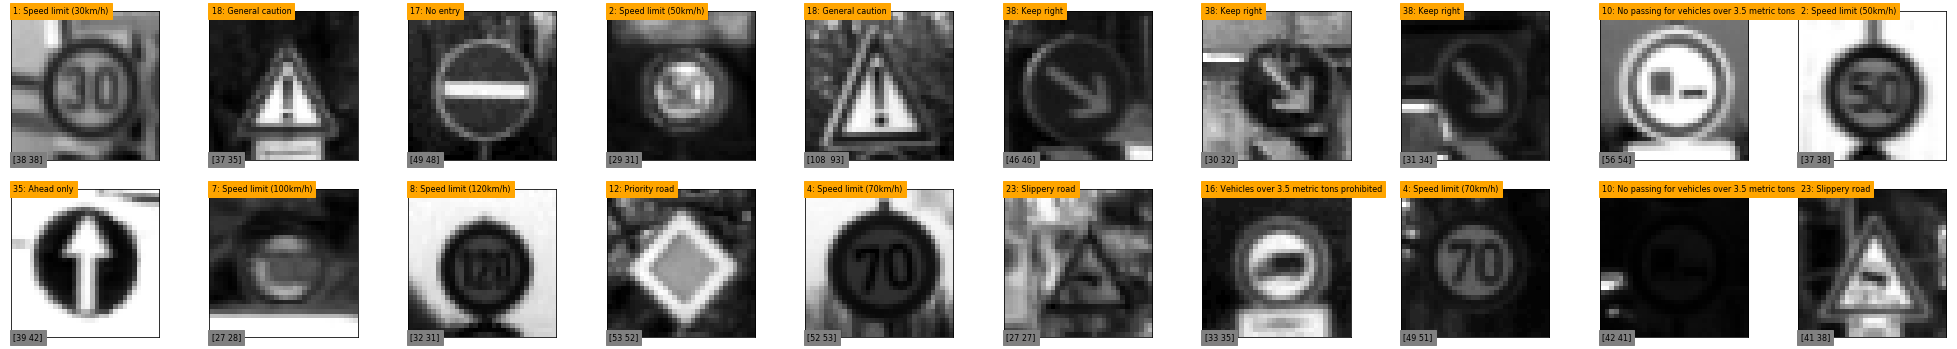

Class: [20]


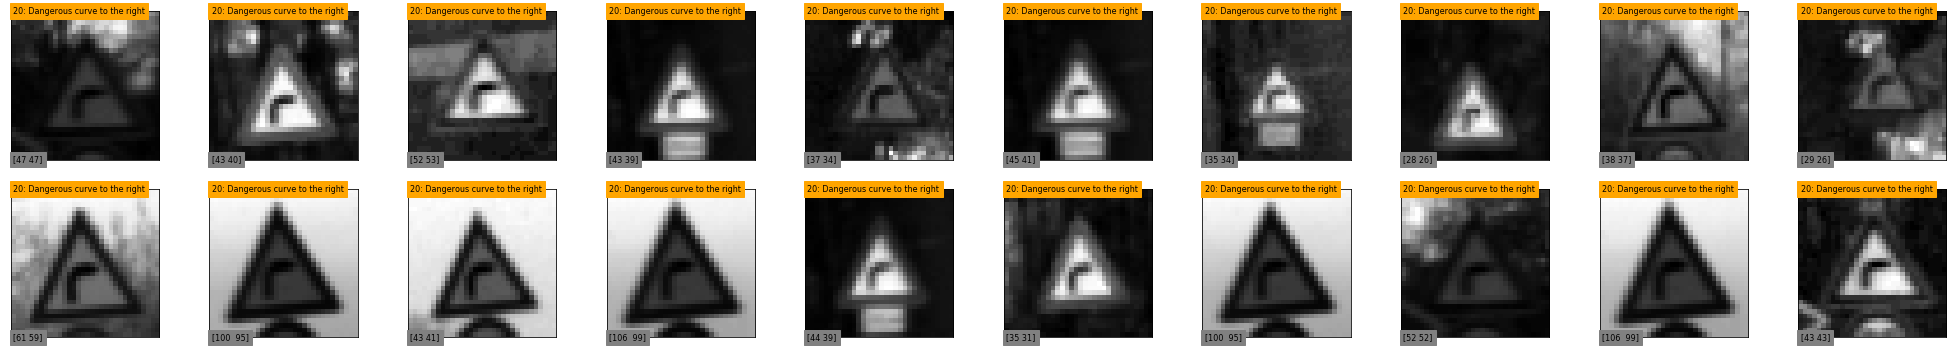

Class: [5]


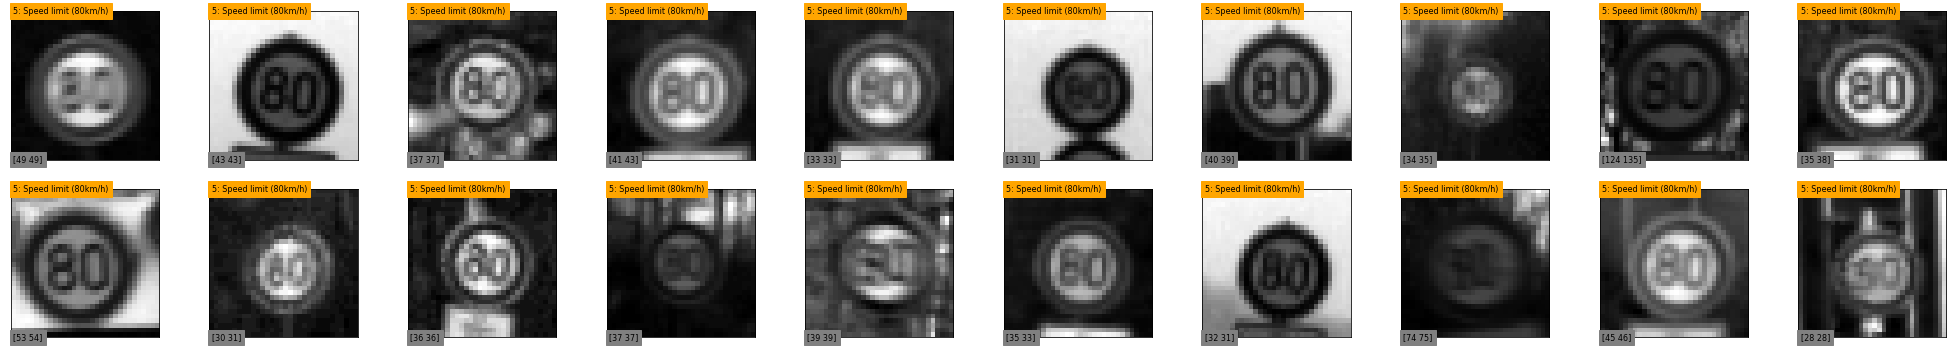

In [101]:
indices = select_images(X_train, y_train, class_id=None, num_images=20)
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], cmap='gray', func=grayscale)
indices = select_images(X_train, y_train, class_id=20, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], cmap='gray', func=grayscale)
indices = select_images(X_train, y_train, class_id=5, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], cmap='gray', func=grayscale)

And below is the example of above traffic sign images after normalizing.

Class: [ 1  2  4  7  8 10 12 16 17 18 23 35 38]


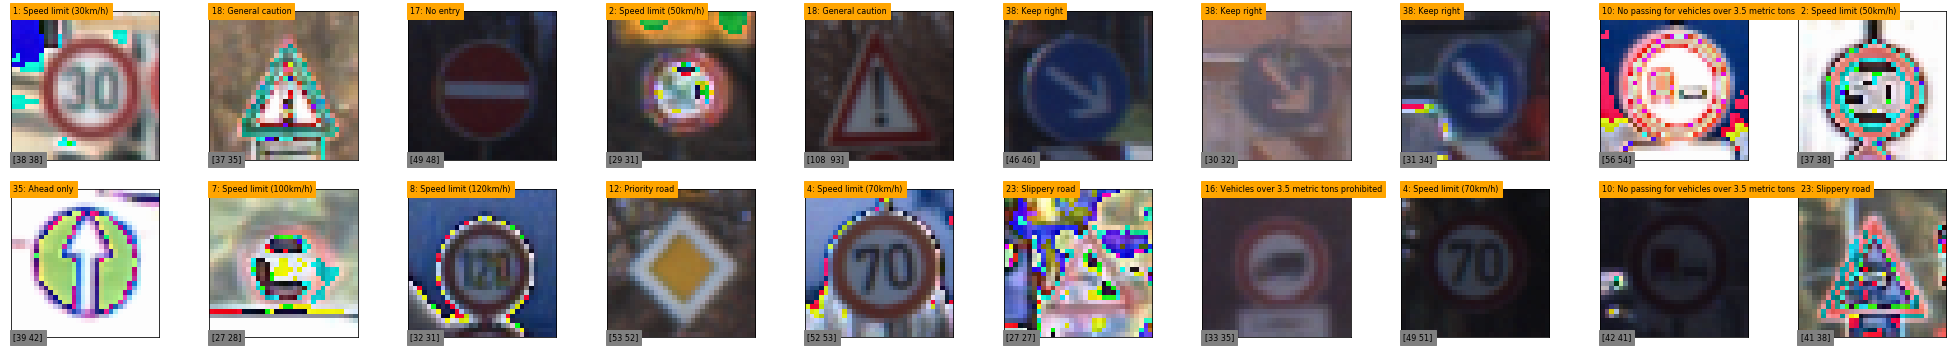

Class: [20]


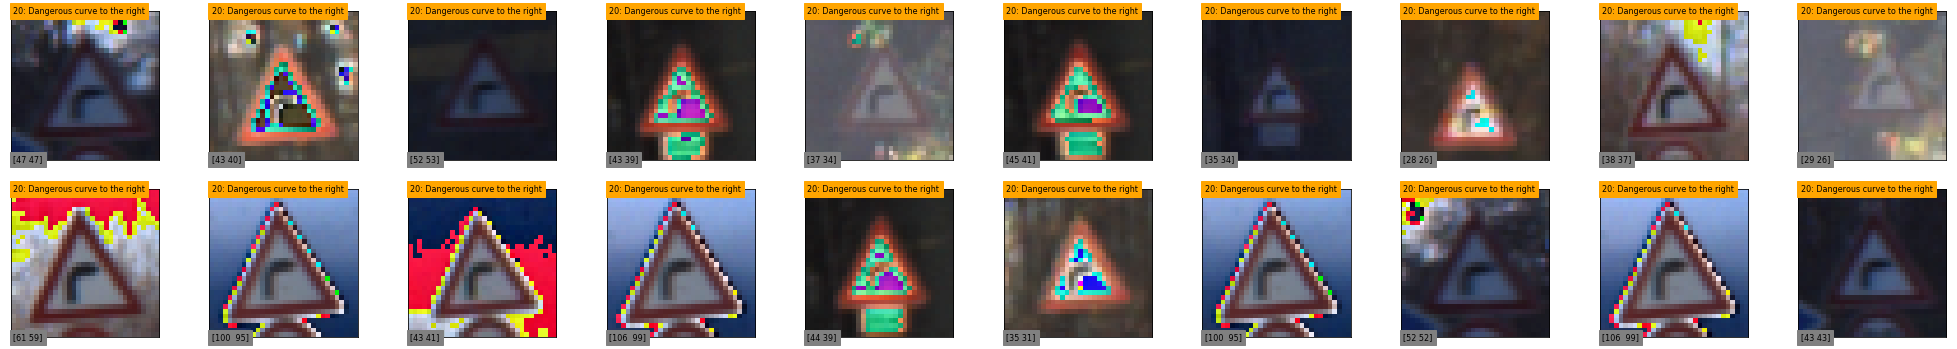

Class: [5]


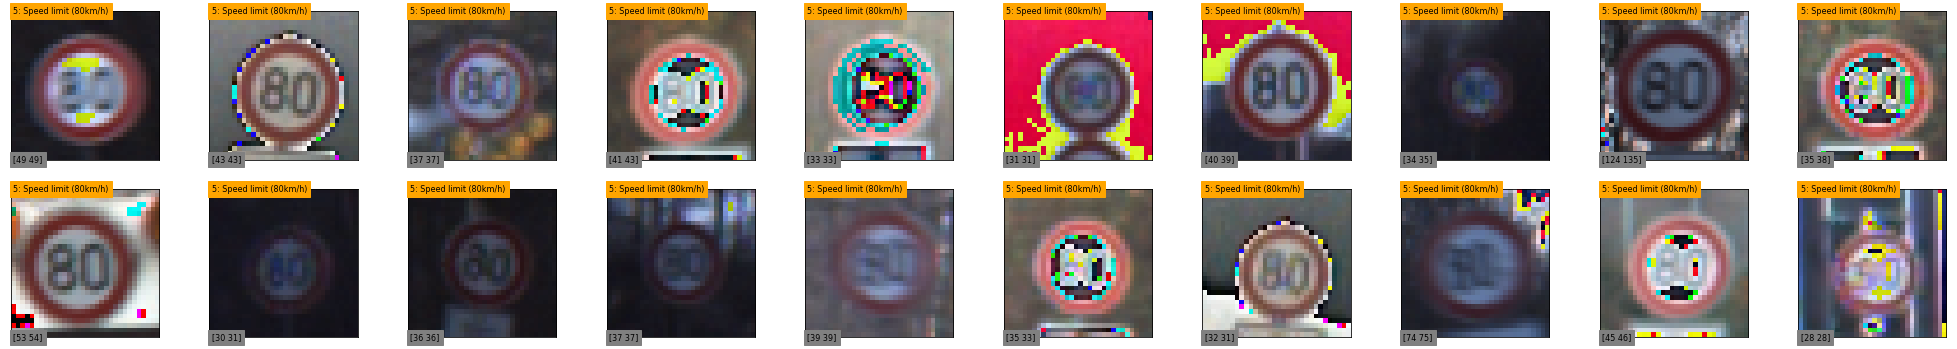

In [11]:
indices = select_images(X_train, y_train, class_id=None, num_images=20)
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], func=normalize)
indices = select_images(X_train, y_train, class_id=20, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], func=normalize)
indices = select_images(X_train, y_train, class_id=5, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], func=normalize)

Since the class distributions are skewed, additional data is generated based on the current data with some modifications based on the image characteristics that the signs may be not straight and centered but slightly translated and rotated. Some image augmentation methods are considered such as translation, rotation, distortion, brightness adjustment, etc.

In [9]:
def rotate_image(img, angle):
    """
    Randomly rotate the image within the provided angle
    """
    if angle == 0:
        return img
    angle = np.random.uniform(-angle, angle)
    num_rows, num_cols = img.shape[:2]
    scale = 1.0
    rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), angle, 1)
    img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
    return img_rotation


def translate_image(img, translation):
    """
    Randomly move the image horizontally and vertically within provided translation pixel
    """
    if translation == 0:
        return 0
    x = np.random.uniform(-translation, translation)
    y = np.random.uniform(-translation, translation)  
    num_rows, num_cols = img.shape[:2]
    translation_matrix = np.float32([ [1,0,x], [0,1,y] ])
    img_translation = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows))
    return img_translation

def distort_image(img, shear):
    """
    Randomly distort the image horizontally and vertically within a provided amount
    """
    if shear == 0:
        return img
    num_rows, num_cols = img.shape[:2]
    left, right, top, bottom = shear, num_cols - shear, shear, num_rows - shear
    dx = np.random.uniform(-shear, shear)
    dy = np.random.uniform(-shear, shear)
    src_points = np.float32([[left   , top],[right   , top   ],[left, bottom]])
    dst_points = np.float32([[left+dx, top],[right+dx, top+dy],[left, bottom+dy]])
    affine_matrix = cv2.getAffineTransform(src_points,dst_points)
    img_distortion = cv2.warpAffine(img, affine_matrix, (num_cols, num_rows))
    return img_distortion

def adjust_brightness(img, ratio):
    """
    Randomly adjust brightness of the image.
    """
    # Change image to HSV (Hue, Saturation, Value) is also called HSB ('B' for Brightness).
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # Get only v channel for brightness adjustment
    brightness = np.float64(hsv[:, :, 2])
    # Add random brightness adjustment
    brightness = brightness * (1.0 + np.random.uniform(-ratio, ratio))   
    brightness[brightness>255] = 255
    brightness[brightness<0] = 0
    hsv[:, :, 2] = brightness
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    
def augment_image(img, angle=5.0, translation=3, shear=2, ratio=0.5):
    img = rotate_image(img, angle)
    img = translate_image(img, translation)
    img = distort_image(img, shear)
    img = adjust_brightness(img, ratio)
    return img

And below is the example of above traffic sign images after augmentation with default parameters.

Class: [ 1  2  4  7  8 10 12 16 17 18 23 35 38]


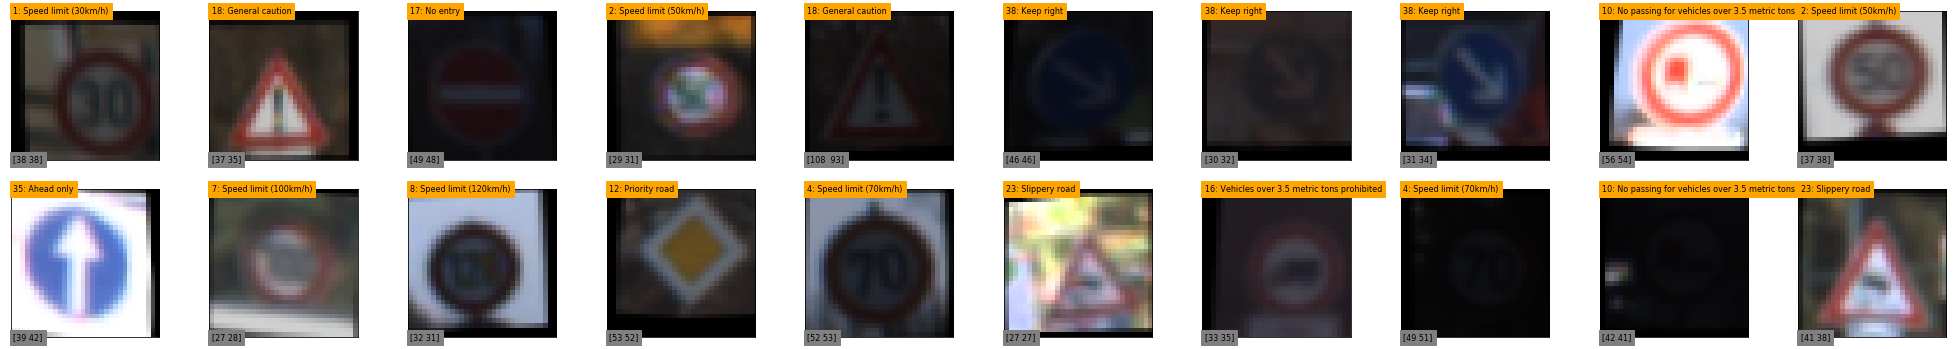

Class: [20]


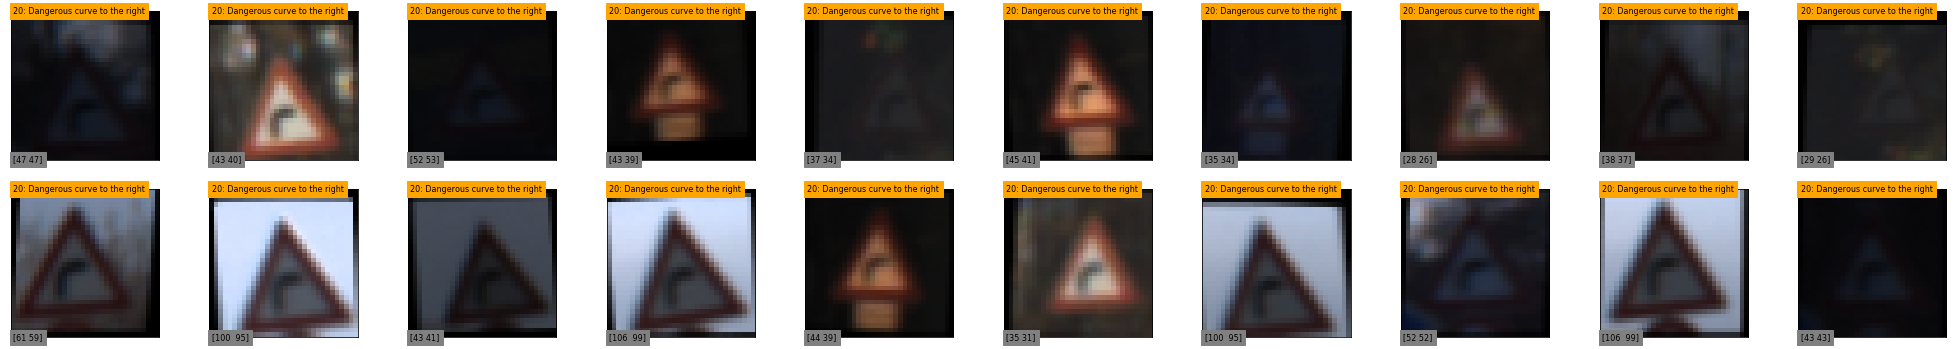

Class: [5]


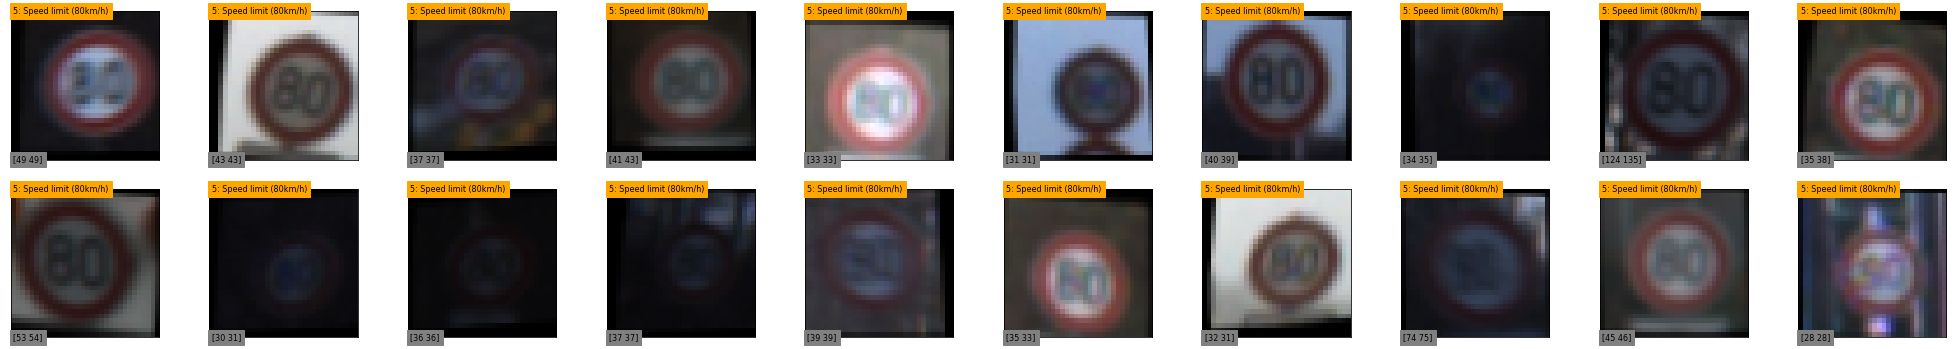

In [13]:
indices = select_images(X_train, y_train, class_id=None, num_images=20)
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], func=augment_image)
indices = select_images(X_train, y_train, class_id=20, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], func=augment_image)
indices = select_images(X_train, y_train, class_id=5, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], func=augment_image)

### 2. Model Architecture

The model is based on LeNet by Yann LeCun. It is a convolutional neural network designed to recognize visual patterns directly from pixel images with minimal preprocessing. It can handle hand-written characters very well.

Source: http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf

![LeNet Architecture](lenet.png)
Source: Yan LeCun

The inputs are 32x32 (1 channel) images

Convolution layers uses 2x2 sub-sampling (valid padding, max pooling, no dropout)

First fully connected layer includes 120 output.

Second fully connected layer includes 84 output corresponding to 7x12 bitmap for each class, which is a label. 

Third fully connected layer includes 10 output corresponding to 10 classes (the digits '0' - '9')

The output is compared with all the labels (bitmaps) to calculate the error

The class with the smallest error is an estimated digit value

My final model consisted of the following layers:

Layer        | Description
------------ | -------------
Input	| 32x32x3 RGB image
Convolution 5x5x12	| 1x1 stride, valid padding, outputs 28x28x12
ReLU |	
Max pooling	| 2x2 stride, outputs 14x14x12
Convolution 5x5x32	| 1x1 stride, valid padding, outputs 10x10x32
ReLU	|
Max pooling	| 2x2 stride, outputs 5x5x32
Flatten | outputs 800
Fully connected	| outputs 240
ReLU |
Fully connected	| outputs n_classes
Softmax	|

In [10]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

# LeNet based CNN
def sign_cnn(x, conv1_shape=(5, 5, 3, 6), conv2_shape=(5, 5, 6, 16), fc1_shape=(400, 120), fc2_shape=(120, 43)):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6, conv1_shape=(5, 5, 3, 6)
    conv1_W = tf.Variable(tf.truncated_normal(shape=conv1_shape, mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(conv1_shape[3]))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16, conv2_shape=(5, 5, 6, 16)
    conv2_W = tf.Variable(tf.truncated_normal(shape=conv2_shape, mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(conv2_shape[3]))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0 = tf.contrib.layers.flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120, fc1_shape=(400, 120)
    fc1_W = tf.Variable(tf.truncated_normal(shape=fc1_shape, mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(fc1_shape[1]))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1    = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 43, fc2_shape=(120, 43)
    fc2_W = tf.Variable(tf.truncated_normal(shape=fc2_shape, mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(fc2_shape[1]))
    signs   = tf.matmul(fc1, fc2_W) + fc2_b
    
    return signs



### 3. Train, Validate and Test the Model

To train the model, I used a training pipeline using Adam optimizer, the batch size is 128, number of epochs is 10 and learning rate = 0.001. The number of epochs and batch size affect the training speed and model accuracy.

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.


In [53]:
def evaluate(X_data, y_data, accuracy_operation, batch_size, x, y):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples   
    
def sign_pipeline(X_train, y_train, X_validation, y_validation, input_shape=(None, 32, 32, 3), n_classes=43, \
                  conv1_shape=(5, 5, 3, 6), conv2_shape=(5, 5, 6, 16), fc1_shape=(400, 120), fc2_shape=(120, 43), \
                  epochs=10, batch_size=128, learning_rate=0.001, save_path='checkpoint/network.ckpt', isPlot=True):
    
    # Features and Labels
    # Train cnn to classify sign data. 
    # x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.
    #input_shape=(None, 32, 32, 3)
    x = tf.placeholder(tf.float32, input_shape)
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, n_classes)
    
    # Training Pipeline: Create a training pipeline that uses the model to classify sign data.
    signs = sign_cnn(x, conv1_shape, conv2_shape, fc1_shape, fc2_shape)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=signs)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
    training_operation = optimizer.minimize(loss_operation)
    
    # Model Evaluation: Evaluate how well the loss and accuracy of the model for a given dataset.
    correct_prediction = tf.equal(tf.argmax(signs, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # Model testing
    prediction = tf.argmax(signs, 1, name='prediction')
    probability = tf.nn.softmax(signs, name='probability')
    k = tf.placeholder(tf.int32, name='k')
    top_k = tf.nn.top_k(probability, k=k) 
    
    saver = tf.train.Saver()
 
    # Train the Model: Run the training data through the training pipeline to train the model. 
    # Before each epoch, shuffle the training set. 
    # After each epoch, measure the loss and accuracy of the validation set. 
    # Save the model after training.
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Training...")
        print()
        train_accuracy=[]
        validation_accuracy =[]
        for i in range(epochs):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            train_accuracy.append(evaluate(X_train, y_train, accuracy_operation, batch_size, x, y))
            validation_accuracy.append(evaluate(X_validation, y_validation, accuracy_operation, batch_size, x, y))
            print("EPOCH {} ...".format(i+1))
            print("Train Accuracy = {:.3f}".format(train_accuracy[i]))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy[i]))

        saver.save(sess, save_path)
        print("Model saved")
        
        if isPlot==True:
            plt.figure()
            plt.plot(range(len(train_accuracy)), train_accuracy, color='blue', label="Train")
            plt.plot(range(len(validation_accuracy)), validation_accuracy, color='green', label="Validation")
            plt.xlabel("Epochs"), plt.ylabel("Accuracy"), plt.title("Train Accuracy and Validation Accuracy over Epochs")
            plt.ylim(ymax=1)
            plt.legend()
        
    return

Training...

EPOCH 1 ...
Train Accuracy = 0.903
Validation Accuracy = 0.822
EPOCH 2 ...
Train Accuracy = 0.959
Validation Accuracy = 0.877
EPOCH 3 ...
Train Accuracy = 0.975
Validation Accuracy = 0.883
EPOCH 4 ...
Train Accuracy = 0.989
Validation Accuracy = 0.904
EPOCH 5 ...
Train Accuracy = 0.992
Validation Accuracy = 0.896
Model saved
Test Accuracy = 0.893


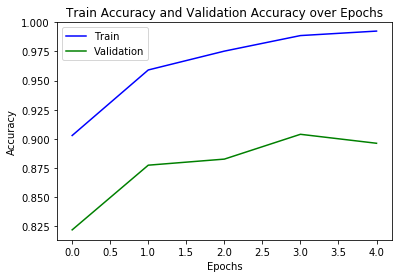

My final model results were:

training set accuracy of ?

validation set accuracy of ?

test set accuracy of ?


### 4. Describe the approach taken for finding a solution

**First, try the LeNet-based architect without image pre-processing.**

Layer        | Description
------------ | -------------
Input	| 32x32x3 RGB image
Convolution 5x5x6	| 1x1 stride, valid padding, outputs 28x28x6
ReLU |	
Max pooling	| 2x2 stride, outputs 14x14x6
Convolution 5x5x16	| 1x1 stride, valid padding, outputs 10x10x16
ReLU	|
Max pooling	| 2x2 stride, outputs 5x5x16
Flatten | outputs 400
Fully connected	| outputs 120
ReLU |
Fully connected	| outputs n_classes
Softmax	|

In [99]:
sign_pipeline(X_train, y_train, X_validation, y_validation, input_shape=(None, 32, 32, 3), n_classes=43, \
                  conv1_shape=(5, 5, 3, 6), conv2_shape=(5, 5, 6, 16), fc1_shape=(400, 120), fc2_shape=(120, 43), \
                  epochs=10, batch_size=128, learning_rate=0.001, save_path='checkpoint/network01.ckpt')

Training...

EPOCH 1 ...
Train Accuracy = 0.739
Validation Accuracy = 0.641

EPOCH 2 ...
Train Accuracy = 0.887
Validation Accuracy = 0.784

EPOCH 3 ...
Train Accuracy = 0.930
Validation Accuracy = 0.817

EPOCH 4 ...
Train Accuracy = 0.943
Validation Accuracy = 0.832

EPOCH 5 ...
Train Accuracy = 0.960
Validation Accuracy = 0.854

EPOCH 6 ...
Train Accuracy = 0.966
Validation Accuracy = 0.855

EPOCH 7 ...
Train Accuracy = 0.968
Validation Accuracy = 0.856

EPOCH 8 ...
Train Accuracy = 0.981
Validation Accuracy = 0.873

EPOCH 9 ...
Train Accuracy = 0.985
Validation Accuracy = 0.876

EPOCH 10 ...
Train Accuracy = 0.988
Validation Accuracy = 0.878

Model saved


The result shows vadidation accuracy is still a little bit low. Validation accuracy still increases when train accuracy increases, so I re-run the network with more epochs.

Training...

EPOCH 1 ...
Train Accuracy = 0.259
Validation Accuracy = 0.227
EPOCH 2 ...
Train Accuracy = 0.518
Validation Accuracy = 0.454
EPOCH 3 ...
Train Accuracy = 0.664
Validation Accuracy = 0.585
EPOCH 4 ...
Train Accuracy = 0.756
Validation Accuracy = 0.669
EPOCH 5 ...
Train Accuracy = 0.813
Validation Accuracy = 0.729
Model saved


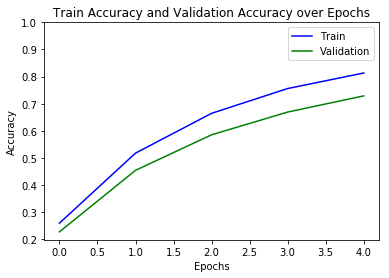

In [61]:
sign_pipeline(X_train, y_train, X_validation, y_validation, input_shape=(None, 32, 32, 3), n_classes=43, \
                  conv1_shape=(5, 5, 3, 6), conv2_shape=(5, 5, 6, 16), fc1_shape=(400, 120), fc2_shape=(120, 43), \
                  epochs=5, batch_size=1024, learning_rate=0.001, save_path='checkpoint/network01.ckpt')



Then, I applied pre-processing methods separately to see which method is useful for this dataset.

**Apply grayscale and run the network again**

In [98]:
# for grayscale, we need to add the 3rd dimension back (1 channel) as it's expected by the network
X_train_pre = np.array([grayscale(x)[:, :, np.newaxis] for x in X_train])
X_validation_pre = np.array([grayscale(x)[:, :, np.newaxis] for x in X_validation])
sign_pipeline(X_train_pre, y_train, X_validation_pre, y_validation, input_shape=(None, 32, 32, 1), n_classes=43, \
                  conv1_shape=(5, 5, 1, 6), conv2_shape=(5, 5, 6, 16), fc1_shape=(400, 120), fc2_shape=(120, 43), \
                  epochs=20, batch_size=128, learning_rate=0.001, save_path='checkpoint/network02.ckpt')

Training...

EPOCH 1 ...
Train Accuracy = 0.804
Validation Accuracy = 0.710

EPOCH 2 ...
Train Accuracy = 0.906
Validation Accuracy = 0.811

EPOCH 3 ...
Train Accuracy = 0.945
Validation Accuracy = 0.855

EPOCH 4 ...
Train Accuracy = 0.956
Validation Accuracy = 0.869

EPOCH 5 ...
Train Accuracy = 0.972
Validation Accuracy = 0.872

EPOCH 6 ...
Train Accuracy = 0.984
Validation Accuracy = 0.893

EPOCH 7 ...
Train Accuracy = 0.984
Validation Accuracy = 0.886

EPOCH 8 ...
Train Accuracy = 0.985
Validation Accuracy = 0.895

EPOCH 9 ...
Train Accuracy = 0.986
Validation Accuracy = 0.899

EPOCH 10 ...
Train Accuracy = 0.986
Validation Accuracy = 0.905

Model saved


**Apply normalization and run the network again with more epochs**

In [100]:
X_train_pre = np.array([normalize(x, method=2) for x in X_train])
X_validation_pre = np.array([normalize(x, method=2) for x in X_validation])
sign_pipeline(X_train_pre, y_train, X_validation_pre, y_validation, input_shape=(None, 32, 32, 3), n_classes=43, \
                  conv1_shape=(5, 5, 3, 6), conv2_shape=(5, 5, 6, 16), fc1_shape=(400, 120), fc2_shape=(120, 43), \
                  epochs=20, batch_size=128, learning_rate=0.001, save_path='checkpoint/network03.ckpt')

Training...

EPOCH 1 ...
Train Accuracy = 0.895
Validation Accuracy = 0.803

EPOCH 2 ...
Train Accuracy = 0.970
Validation Accuracy = 0.885

EPOCH 3 ...
Train Accuracy = 0.983
Validation Accuracy = 0.897

EPOCH 4 ...
Train Accuracy = 0.989
Validation Accuracy = 0.902

EPOCH 5 ...
Train Accuracy = 0.989
Validation Accuracy = 0.898

EPOCH 6 ...
Train Accuracy = 0.994
Validation Accuracy = 0.918

EPOCH 7 ...
Train Accuracy = 0.990
Validation Accuracy = 0.886

EPOCH 8 ...
Train Accuracy = 0.989
Validation Accuracy = 0.895

EPOCH 9 ...
Train Accuracy = 0.994
Validation Accuracy = 0.908

EPOCH 10 ...
Train Accuracy = 0.997
Validation Accuracy = 0.908

EPOCH 11 ...
Train Accuracy = 0.995
Validation Accuracy = 0.906

EPOCH 12 ...
Train Accuracy = 0.995
Validation Accuracy = 0.900

EPOCH 13 ...
Train Accuracy = 0.996
Validation Accuracy = 0.915

EPOCH 14 ...
Train Accuracy = 0.998
Validation Accuracy = 0.915

EPOCH 15 ...
Train Accuracy = 0.995
Validation Accuracy = 0.910

EPOCH 16 ...
Train Ac

**Apply augmentation and run the network**

Training...

EPOCH 1 ...
Train Accuracy = 0.062
Validation Accuracy = 0.041

EPOCH 2 ...
Train Accuracy = 0.069
Validation Accuracy = 0.064

EPOCH 3 ...
Train Accuracy = 0.075
Validation Accuracy = 0.068

EPOCH 4 ...
Train Accuracy = 0.158
Validation Accuracy = 0.159

EPOCH 5 ...
Train Accuracy = 0.285
Validation Accuracy = 0.273

EPOCH 6 ...
Train Accuracy = 0.407
Validation Accuracy = 0.435

EPOCH 7 ...
Train Accuracy = 0.496
Validation Accuracy = 0.494

EPOCH 8 ...
Train Accuracy = 0.576
Validation Accuracy = 0.571

EPOCH 9 ...
Train Accuracy = 0.632
Validation Accuracy = 0.617

EPOCH 10 ...
Train Accuracy = 0.678
Validation Accuracy = 0.651

EPOCH 11 ...
Train Accuracy = 0.733
Validation Accuracy = 0.689

EPOCH 12 ...
Train Accuracy = 0.756
Validation Accuracy = 0.688

EPOCH 13 ...
Train Accuracy = 0.808
Validation Accuracy = 0.728

EPOCH 14 ...
Train Accuracy = 0.830
Validation Accuracy = 0.733

EPOCH 15 ...
Train Accuracy = 0.857
Validation Accuracy = 0.759

EPOCH 16 ...
Train Ac

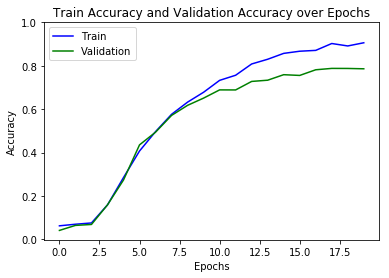

In [24]:
X_train_pre = np.array([augment_image(x) for x in X_train])
#X_validation_pre = np.array([normalize(x) for x in X_validation])
sign_pipeline(X_train_pre, y_train, X_validation, y_validation, input_shape=(None, 32, 32, 3), n_classes=43, \
                  conv1_shape=(5, 5, 3, 6), conv2_shape=(5, 5, 6, 16), fc1_shape=(400, 120), fc2_shape=(120, 43), \
                  epochs=20, batch_size=128, learning_rate=0.001, save_path='checkpoint/network04.ckpt')

**Apply both grayscale and normalization and run the network again with epochs=20**

Training...

EPOCH 1 ...
Train Accuracy = 0.904
Validation Accuracy = 0.842

EPOCH 2 ...
Train Accuracy = 0.962
Validation Accuracy = 0.881

EPOCH 3 ...
Train Accuracy = 0.974
Validation Accuracy = 0.894

EPOCH 4 ...
Train Accuracy = 0.984
Validation Accuracy = 0.905

EPOCH 5 ...
Train Accuracy = 0.987
Validation Accuracy = 0.902

EPOCH 6 ...
Train Accuracy = 0.988
Validation Accuracy = 0.901

EPOCH 7 ...
Train Accuracy = 0.996
Validation Accuracy = 0.911

EPOCH 8 ...
Train Accuracy = 0.996
Validation Accuracy = 0.912

EPOCH 9 ...
Train Accuracy = 0.996
Validation Accuracy = 0.913

EPOCH 10 ...
Train Accuracy = 0.999
Validation Accuracy = 0.919

EPOCH 11 ...
Train Accuracy = 0.998
Validation Accuracy = 0.916

EPOCH 12 ...
Train Accuracy = 0.996
Validation Accuracy = 0.913

EPOCH 13 ...
Train Accuracy = 0.998
Validation Accuracy = 0.920

EPOCH 14 ...
Train Accuracy = 0.994
Validation Accuracy = 0.907

EPOCH 15 ...
Train Accuracy = 0.995
Validation Accuracy = 0.926

EPOCH 16 ...
Train Ac

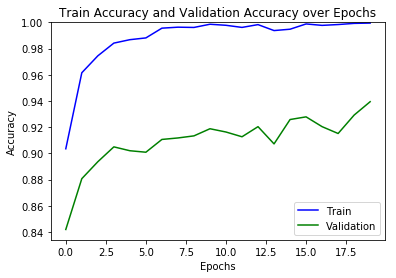

In [22]:
X_train_pre = np.array([normalize(grayscale(x), method=2)[:,:,np.newaxis] for x in X_train])
X_validation_pre = np.array([normalize(grayscale(x), method=2)[:,:,np.newaxis] for x in X_validation])
sign_pipeline(X_train_pre, y_train, X_validation_pre, y_validation, input_shape=(None, 32, 32, 1), n_classes=43, \
                  conv1_shape=(5, 5, 1, 6), conv2_shape=(5, 5, 6, 16), fc1_shape=(400, 120), fc2_shape=(120, 43), \
                  epochs=20, batch_size=128, learning_rate=0.001, save_path='checkpoint/network05.ckpt')

**Double network settings on original dataset**

Layer        | Description
------------ | -------------
Input	| 32x32x3 RGB image
Convolution 5x5x12	| 1x1 stride, valid padding, outputs 28x28x12
ReLU |	
Max pooling	| 2x2 stride, outputs 14x14x12
Convolution 5x5x32	| 1x1 stride, valid padding, outputs 10x10x32
ReLU	|
Max pooling	| 2x2 stride, outputs 5x5x32
Flatten | outputs 800
Fully connected	| outputs 240
ReLU |
Fully connected	| outputs n_classes
Softmax	|


Training...

EPOCH 1 ...
Train Accuracy = 0.776
Validation Accuracy = 0.663

EPOCH 2 ...
Train Accuracy = 0.914
Validation Accuracy = 0.779

EPOCH 3 ...
Train Accuracy = 0.951
Validation Accuracy = 0.804

EPOCH 4 ...
Train Accuracy = 0.971
Validation Accuracy = 0.837

EPOCH 5 ...
Train Accuracy = 0.977
Validation Accuracy = 0.834

EPOCH 6 ...
Train Accuracy = 0.987
Validation Accuracy = 0.851

EPOCH 7 ...
Train Accuracy = 0.990
Validation Accuracy = 0.853

EPOCH 8 ...
Train Accuracy = 0.994
Validation Accuracy = 0.866

EPOCH 9 ...
Train Accuracy = 0.992
Validation Accuracy = 0.867

EPOCH 10 ...
Train Accuracy = 0.991
Validation Accuracy = 0.872

Model saved


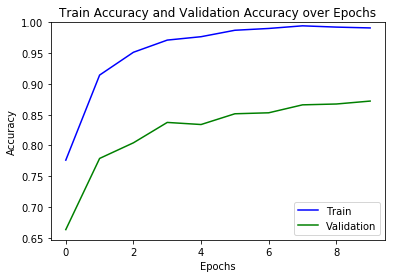

In [25]:
sign_pipeline(X_train, y_train, X_validation, y_validation, input_shape=(None, 32, 32, 3), n_classes=43, \
                  conv1_shape=(5, 5, 3, 12), conv2_shape=(5, 5, 12, 32), fc1_shape=(800, 240), fc2_shape=(240, 43), \
                  epochs=20, batch_size=128, learning_rate=0.001, save_path='checkpoint/network06.ckpt')

**Apply normalization and grayscale pre-processing and double network settings**

Training...

EPOCH 1 ...
Train Accuracy = 0.949
Validation Accuracy = 0.862

EPOCH 2 ...
Train Accuracy = 0.983
Validation Accuracy = 0.898

EPOCH 3 ...
Train Accuracy = 0.993
Validation Accuracy = 0.912

EPOCH 4 ...
Train Accuracy = 0.996
Validation Accuracy = 0.909

EPOCH 5 ...
Train Accuracy = 0.996
Validation Accuracy = 0.929

EPOCH 6 ...
Train Accuracy = 0.998
Validation Accuracy = 0.920

EPOCH 7 ...
Train Accuracy = 0.998
Validation Accuracy = 0.934

EPOCH 8 ...
Train Accuracy = 0.997
Validation Accuracy = 0.924

EPOCH 9 ...
Train Accuracy = 0.994
Validation Accuracy = 0.938

EPOCH 10 ...
Train Accuracy = 0.999
Validation Accuracy = 0.928

EPOCH 11 ...
Train Accuracy = 0.999
Validation Accuracy = 0.934

EPOCH 12 ...
Train Accuracy = 0.999
Validation Accuracy = 0.933

EPOCH 13 ...
Train Accuracy = 0.999
Validation Accuracy = 0.927

EPOCH 14 ...
Train Accuracy = 1.000
Validation Accuracy = 0.946

EPOCH 15 ...
Train Accuracy = 0.991
Validation Accuracy = 0.921

EPOCH 16 ...
Train Ac

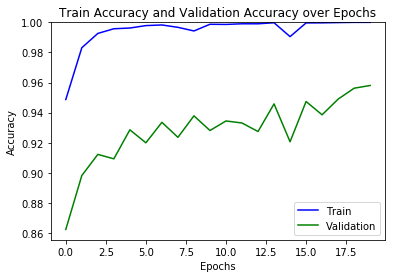

In [30]:
X_train_pre = np.array([normalize(grayscale(x), method=2)[:,:,np.newaxis] for x in X_train])
X_validation_pre = np.array([normalize(grayscale(x), method=2)[:,:,np.newaxis] for x in X_validation])
sign_pipeline(X_train_pre, y_train, X_validation_pre, y_validation, input_shape=(None, 32, 32, 1), n_classes=43, \
                  conv1_shape=(5, 5, 1, 12), conv2_shape=(5, 5, 12, 32), fc1_shape=(800, 240), fc2_shape=(240, 43), \
                  epochs=20, batch_size=128, learning_rate=0.001, save_path='checkpoint/network07.ckpt')

**Increase Number of Epochs, Descrease Learning rate with the double network settings**

Training...

EPOCH 1 ...
Train Accuracy = 0.909
Validation Accuracy = 0.818
EPOCH 2 ...
Train Accuracy = 0.964
Validation Accuracy = 0.879
EPOCH 3 ...
Train Accuracy = 0.982
Validation Accuracy = 0.897
EPOCH 4 ...
Train Accuracy = 0.990
Validation Accuracy = 0.910
EPOCH 5 ...
Train Accuracy = 0.994
Validation Accuracy = 0.912
EPOCH 6 ...
Train Accuracy = 0.997
Validation Accuracy = 0.910
EPOCH 7 ...
Train Accuracy = 0.998
Validation Accuracy = 0.914
EPOCH 8 ...
Train Accuracy = 0.997
Validation Accuracy = 0.910
EPOCH 9 ...
Train Accuracy = 0.998
Validation Accuracy = 0.913
EPOCH 10 ...
Train Accuracy = 0.994
Validation Accuracy = 0.914
EPOCH 11 ...
Train Accuracy = 0.996
Validation Accuracy = 0.910
EPOCH 12 ...
Train Accuracy = 0.996
Validation Accuracy = 0.913
EPOCH 13 ...
Train Accuracy = 0.999
Validation Accuracy = 0.929
EPOCH 14 ...
Train Accuracy = 1.000
Validation Accuracy = 0.926
EPOCH 15 ...
Train Accuracy = 1.000
Validation Accuracy = 0.934
EPOCH 16 ...
Train Accuracy = 1.000


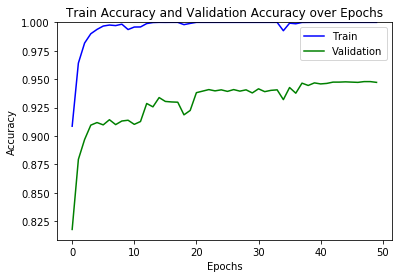

In [43]:
sign_pipeline(X_train_pre, y_train, X_validation_pre, y_validation, input_shape=(None, 32, 32, 1), n_classes=43, \
                  conv1_shape=(5, 5, 1, 12), conv2_shape=(5, 5, 12, 32), fc1_shape=(800, 240), fc2_shape=(240, 43), \
                  epochs=50, batch_size=128, learning_rate=0.0005, save_path='checkpoint/network08.ckpt')

With learning rate=0.0005, the validation accuracy is less variant and get stable accuracy at epoch=40.

The final model is as below

In [47]:
###########################
X_train_pre = np.array([normalize(grayscale(x), method=2)[:,:,np.newaxis] for x in X_train])
X_validation_pre = np.array([normalize(grayscale(x), method=2)[:,:,np.newaxis] for x in X_validation])
X_test_pre = np.array([normalize(grayscale(x), method=2)[:,:,np.newaxis] for x in X_test])
input_shape=(None, 32, 32, 1) 
n_classes=43 
                  
conv1_shape=(5, 5, 1, 12) 
conv2_shape=(5, 5, 12, 32) 
fc1_shape=(800, 240) 
fc2_shape=(240, 43)
                  
epochs=40 
batch_size=128 
learning_rate=0.0005
save_path='checkpoint/network_final.ckpt'

# Features and Labels
# Train cnn to classify sign data. 
# x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.
#input_shape=(None, 32, 32, 3)
x = tf.placeholder(tf.float32, input_shape)
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# Training Pipeline: Create a training pipeline that uses the model to classify sign data.
signs = sign_cnn(x, conv1_shape, conv2_shape, fc1_shape, fc2_shape)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=signs)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation: Evaluate how well the loss and accuracy of the model for a given dataset.
correct_prediction = tf.equal(tf.argmax(signs, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Model testing
prediction = tf.argmax(signs, 1, name='prediction')
probability = tf.nn.softmax(signs, name='probability')
k = tf.placeholder(tf.int32, name='k')
top_k = tf.nn.top_k(probability, k=k) 

saver = tf.train.Saver()

# Train the Model: Run the training data through the training pipeline to train the model. 
# Before each epoch, shuffle the training set. 
# After each epoch, measure the loss and accuracy of the validation set. 
# Save the model after training.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    train_accuracy=[]
    validation_accuracy =[]
    for i in range(epochs):
        X_train_pre, y_train = shuffle(X_train_pre, y_train)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train_pre[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        train_accuracy.append(evaluate(X_train_pre, y_train, accuracy_operation, batch_size, x, y))
        validation_accuracy.append(evaluate(X_validation_pre, y_validation, accuracy_operation, batch_size, x, y))
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy[i]))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy[i]))

    saver.save(sess, save_path)
    print("Model saved")

Training...

EPOCH 1 ...
Train Accuracy = 0.880
Validation Accuracy = 0.792
EPOCH 2 ...
Train Accuracy = 0.954
Validation Accuracy = 0.849
Model saved


### Test dataset

In [54]:
with tf.Session() as sess:
    saver.restore(sess, save_path)
    
    testing_accuracy = evaluate(X_test_pre, y_test, accuracy_operation, batch_size, x, y)
    print("Testing Accuracy = {:.3f}".format(testing_accuracy))

Testing Accuracy = 0.850


---

## Step 3: Test a Model on New Images

### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.



### 1. Load and Output the Images

Here are ten German traffic signs that I found on the web:

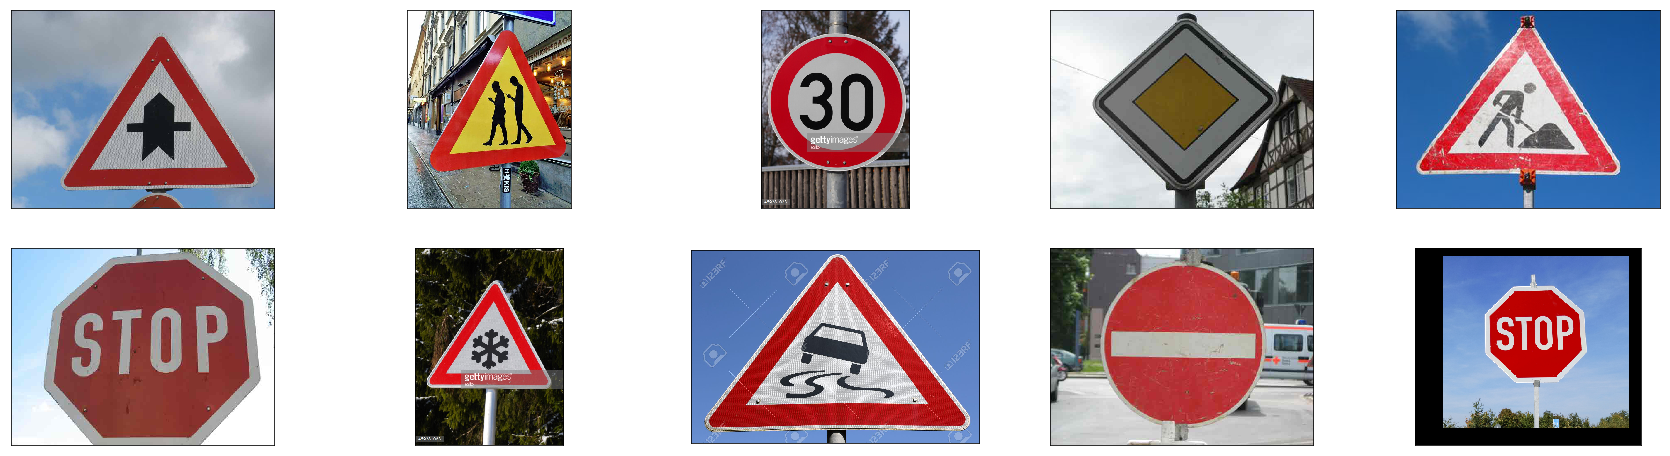

In [217]:
def read_image(img_path):
    img = cv2.imread(img_path)
    # This is because cv2 read images in (b,g,r)
    (b, g, r)=cv2.split(img)
    img=cv2.merge([r,g,b])
    return img

import glob
X_new_path = np.array(glob.glob('images/image*.jpg') + 
                 glob.glob('images/image*.png') + glob.glob('images/image*.jpeg'))
X_new = np.array([read_image(path) for path in X_new_path])

plt.figure(figsize=(30,8))
for i in range(X_new.shape[0]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_new[i])
    plt.xticks([]), plt.yticks([])    
plt.show()


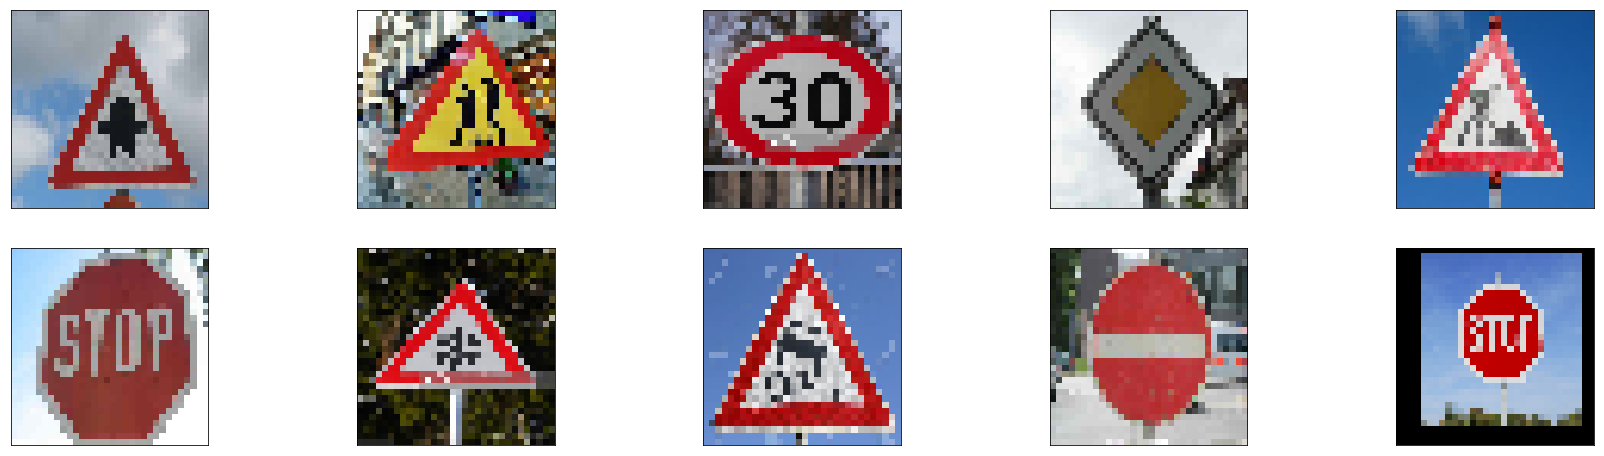

In [218]:
def resize_image(img, shape=(32,32), interpolation=cv2.INTER_CUBIC):
    return cv2.resize(img, shape, interpolation)

X_new_re = np.array([resize_image(x, shape=(32,32), interpolation=cv2.INTER_CUBIC) for x in X_new])
plt.figure(figsize=(30,8))
for i in range(X_new_re.shape[0]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_new_re[i])
    plt.xticks([]), plt.yticks([])    
plt.show()
X_new_pre = np.array([normalize(grayscale(x), method=2)[:,:,np.newaxis] for x in X_new_re])

### 2. Predict the Sign Type for Each Image and Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [219]:
with tf.Session() as sess:
    saver.restore(sess, save_path)
    
    num_examples = len(X_new_pre)
    sess = tf.get_default_session()
    prediction_output = []
    probability_output = []
    for offset in range(0, num_examples, batch_size):
        batch_x = X_new_pre[offset:offset+batch_size]
        prediction_output.append(sess.run(prediction, feed_dict={x: batch_x}))
        probability_output.append(sess.run([probability, top_k],
                         feed_dict={x: batch_x, k: 5}))
           
    print("Prediction Result = \n{}".format(prediction_output))
    print("Probability Result = \n{}".format(probability_output))

Prediction Result = 
[array([11, 29,  0, 12, 25, 14,  2, 23, 17, 30])]
Probability Result = 
[[array([[  1.68830780e-08,   3.61702178e-07,   8.81430085e-12,
          1.26135066e-11,   2.13574953e-14,   6.11244459e-08,
          2.16863647e-08,   2.41191344e-07,   3.37882812e-11,
          4.68545203e-10,   4.29444064e-10,   9.99860287e-01,
          1.93041984e-07,   8.74476408e-14,   2.50722123e-16,
          3.91375369e-20,   2.44370160e-08,   6.37401243e-12,
          4.21319609e-13,   2.96664467e-07,   5.38942294e-11,
          5.39789335e-06,   1.95663296e-13,   2.93535606e-07,
          1.89207405e-08,   7.73894060e-10,   1.06688193e-12,
          1.74476753e-07,   1.81953346e-05,   1.46228483e-12,
          6.00960266e-05,   1.71825873e-10,   2.09874571e-08,
          1.15747661e-10,   1.54856838e-09,   1.82584294e-13,
          8.91564112e-14,   4.95521694e-14,   7.64225206e-16,
          2.85340187e-17,   2.73786427e-05,   2.68360091e-05,
          1.83622447e-07],
       [  

In [220]:
ind = list(prediction_output[0])
print(signnames['SignName'][ind])

11    Right-of-way at the next intersection
29                        Bicycles crossing
0                      Speed limit (20km/h)
12                            Priority road
25                                Road work
14                                     Stop
2                      Speed limit (50km/h)
23                            Slippery road
17                                 No entry
30                       Beware of ice/snow
Name: SignName, dtype: object


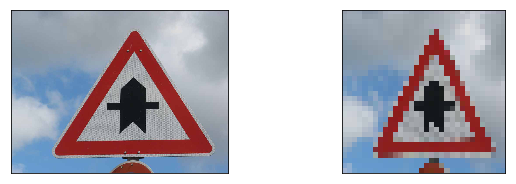

11  Right-of-way at the next intersection: 99.99%
30  Beware of ice/snow: 0.00601%
40  Roundabout mandatory: 0.002738%
41  End of no passing: 0.002684%
28  Children crossing: 0.00182%


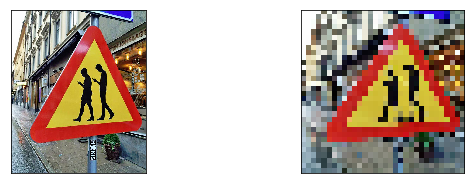

29  Bicycles crossing: 58.98%
24  Road narrows on the right: 17.1%
31  Wild animals crossing: 7.518%
26  Traffic signals: 3.344%
4  Speed limit (70km/h): 3.085%


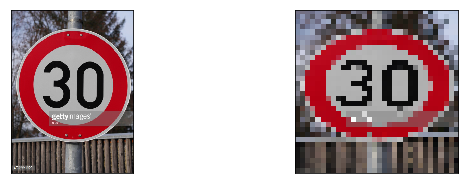

0  Speed limit (20km/h): 75.59%
1  Speed limit (30km/h): 17.79%
16  Vehicles over 3.5 metric tons prohibited: 2.54%
2  Speed limit (50km/h): 2.281%
4  Speed limit (70km/h): 0.6768%


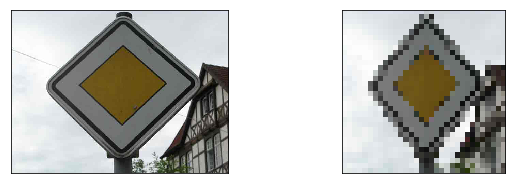

12  Priority road: 98.51%
40  Roundabout mandatory: 1.029%
1  Speed limit (30km/h): 0.1126%
28  Children crossing: 0.1091%
38  Keep right: 0.04983%


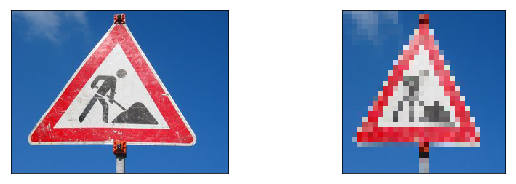

25  Road work: 57.72%
31  Wild animals crossing: 18.91%
22  Bumpy road: 9.606%
21  Double curve: 3.541%
19  Dangerous curve to the left: 2.638%


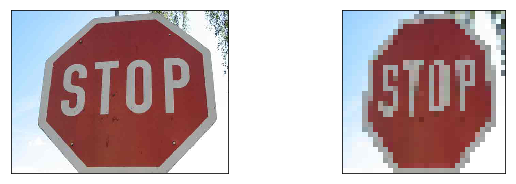

14  Stop: 95.38%
25  Road work: 2.568%
33  Turn right ahead: 1.058%
3  Speed limit (60km/h): 0.2528%
5  Speed limit (80km/h): 0.09625%


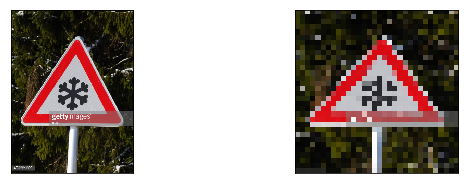

2  Speed limit (50km/h): 95.79%
12  Priority road: 3.339%
40  Roundabout mandatory: 0.5319%
1  Speed limit (30km/h): 0.2657%
8  Speed limit (120km/h): 0.03019%


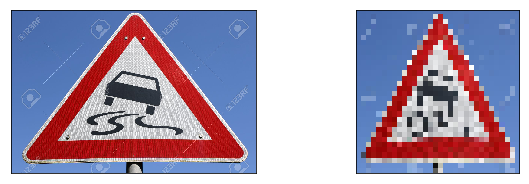

23  Slippery road: 51.2%
11  Right-of-way at the next intersection: 47.86%
27  Pedestrians: 0.3419%
24  Road narrows on the right: 0.3209%
19  Dangerous curve to the left: 0.1841%


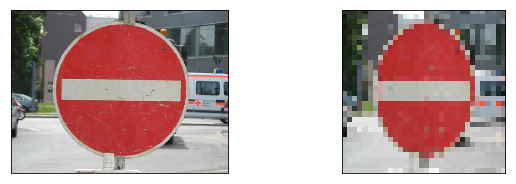

17  No entry: 100.0%
14  Stop: 0.003312%
1  Speed limit (30km/h): 0.0003402%
33  Turn right ahead: 0.0002891%
13  Yield: 8.857e-05%


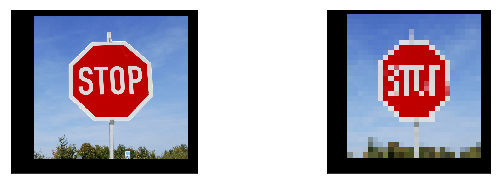

30  Beware of ice/snow: 48.05%
19  Dangerous curve to the left: 25.12%
23  Slippery road: 6.952%
11  Right-of-way at the next intersection: 4.564%
21  Double curve: 3.15%


In [221]:
for id in range(len(probability_output[0][1][0])):
    plt.figure(figsize=(10,3))
    plt.subplot(1, 2, 1)
    plt.imshow(X_new[id])
    plt.xticks([]), plt.yticks([])    
    plt.subplot(1, 2, 2)
    plt.imshow(X_new_re[id])
    plt.xticks([]), plt.yticks([]) 
    plt.show()
    top_5_prob = probability_output[0][1][0][id]*100
    top_5_ind = probability_output[0][1][1][id]
    result = np.array(signnames['SignName'][top_5_ind])
    for idx in range(len(top_5_prob)):
        print("{}  {}: {:.4}%".format(top_5_ind[idx], result[idx], top_5_prob[idx]))

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.